In [77]:
import time as tm
import matplotlib.pyplot as plt

## Input Arquivos

In [78]:

def readFiles():

    arq_1000 = open('resources/1000.txt', 'r', encoding="utf8")

    arq_1000_list = arq_1000.read().split()

    arq_1000_int = []
    for val in arq_1000_list:
        arq_1000_int.append(int(val))
        
    arq_1000.close()
        
    arq_5000 = open('resources/5000.txt', 'r', encoding="utf8")

    arq_5000_list = arq_5000.read().split()

    arq_5000_int = []
    for val in arq_5000_list:
        arq_5000_int.append(int(val))
        
    arq_5000.close()
        
    arq_10000 = open('resources/10000.txt', 'r', encoding="utf8")

    arq_10000_list = arq_10000.read().split()

    arq_10000_int = []
    for val in arq_10000_list:
        arq_10000_int.append(int(val))
        
    arq_10000.close()

    arq_20000 = open('resources/20000.txt', 'r', encoding="utf8")

    arq_20000_list = arq_20000.read().split()

    arq_20000_int = []
    for val in arq_20000_list:
        arq_20000_int.append(int(val))
        
    arq_20000.close()
        
    arq_50000 = open('resources/50000.txt', 'r', encoding="utf8")

    arq_50000_list = arq_50000.read().split()

    arq_50000_int = []
    for val in arq_50000_list:
        arq_50000_int.append(int(val))
        
    arq_50000.close()
        
    arq_75000 = open('resources/75000.txt', 'r', encoding="utf8")

    arq_75000_list = arq_75000.read().split()

    arq_75000_int = []
    for val in arq_75000_list:
        arq_75000_int.append(int(val))
        
    arq_75000.close()
        
    arq_100000 = open('resources/100000.txt', 'r', encoding="utf8")

    arq_100000_list = arq_100000.read().split()

    arq_100000_int = []
    for val in arq_100000_list:
        arq_100000_int.append(int(val))\
    
    arq_100000.close()        
        
    return [arq_1000_int, arq_5000_int, arq_10000_int, arq_20000_int, arq_50000_int, arq_75000_int, arq_100000_int]

# Insertion Sort

In [79]:
# Python program for implementation of Insertion Sort

# Function to do insertion sort
def insertionSort(arr):

	# Traverse through 1 to len(arr)
	for i in range(1, len(arr)):

		key = arr[i]

		# Move elements of arr[0..i-1], that are
		# greater than key, to one position ahead
		# of their current position
		j = i-1
		while j >= 0 and key < arr[j] :
				arr[j + 1] = arr[j]
				j -= 1
		arr[j + 1] = key

# Quick Sort

In [80]:
# Python3 implementation of QuickSort


# Function to find the partition position
def partition(array, low, high):

	# Choose the rightmost element as pivot
	pivot = array[high]

	# Pointer for greater element
	i = low - 1

	# Traverse through all elements
	# compare each element with pivot
	for j in range(low, high):
		if array[j] <= pivot:
			# If element smaller than pivot is found
			# swap it with the greater element pointed by i
			i = i + 1

			# Swapping element at i with element at j
			(array[i], array[j]) = (array[j], array[i])

	# Swap the pivot element with
	# e greater element specified by i
	(array[i + 1], array[high]) = (array[high], array[i + 1])

	# Return the position from where partition is done
	return i + 1

# Function to perform quicksort


def quick_sort(array, low, high):
	if low < high:

		# Find pivot element such that
		# element smaller than pivot are on the left
		# element greater than pivot are on the right
		pi = partition(array, low, high)

		# Recursive call on the left of pivot
		quick_sort(array, low, pi - 1)

		# Recursive call on the right of pivot
		quick_sort(array, pi + 1, high)

# Shell Sort

In [81]:
def shell_sort(inp):
    h = len(inp) // 2
    while h > 0:
        for i in range(h, len(inp)):
            t = inp[i]
            j = i
            while j >= h and inp[j - h] > t:
                inp[j] = inp[j - h]
                j -= h
 
            inp[j] = t
        h = h // 2

# radixSort

In [82]:
# Python program for implementation of Radix Sort
# A function to do counting sort of arr[] according to
# the digit represented by exp.
 
def countingSort(arr, exp1):
 
    n = len(arr)
 
    # The output array elements that will have sorted arr
    output = [0] * (n)
 
    # initialize count array as 0
    count = [0] * (10)
 
    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
 
    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]
 
    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
 
    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
# Method to do Radix Sort
def radixSort(arr):
 
    # Find the maximum number to know number of digits
    max1 = max(arr)
 
    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1 / exp > 0:
        countingSort(arr, exp)
        exp *= 10

# Time

In [83]:
def get_time_insetion_sort_ms(arr):
  start = tm.time()

  insertionSort(arr)

  final = tm.time()

  time = final - start
  
  return time * 1000

def get_time_quick_sort_ms(arr):
  start = tm.time()

  quick_sort(arr, 0, len(arr) - 1)

  final = tm.time()

  time = final - start
  
  return time * 1000

def get_time_shell_sort_ms(arr):
  start = tm.time()

  shell_sort(arr)

  final = tm.time()

  time = final - start
  
  return time * 1000

def get_time_radix_sort_ms(arr):
  start = tm.time()

  radixSort(arr)

  final = tm.time()

  time = final - start
  
  return time * 1000

# Execution

In [84]:
import sys
sys.setrecursionlimit(10000)
print(sys.getrecursionlimit())

10000


In [85]:
execution_time_quick_sort_list = []

files = readFiles()

for file in files:
  execution_time_quick_sort_list.append(get_time_quick_sort_ms(file))

In [86]:
execution_time_insertion_sort_list = []

files = readFiles()

for file in files:
  execution_time_insertion_sort_list.append(get_time_insetion_sort_ms(file))

In [87]:
execution_time_shell_sort_list = []

files = readFiles()

for file in files:
  if file == []:
    print(files[1])
  execution_time_shell_sort_list.append(get_time_shell_sort_ms(file))

In [88]:
execution_time_radix_sort_list = []

files = readFiles()

for file in files:
  execution_time_radix_sort_list.append(get_time_radix_sort_ms(file))

# Visualizaçao

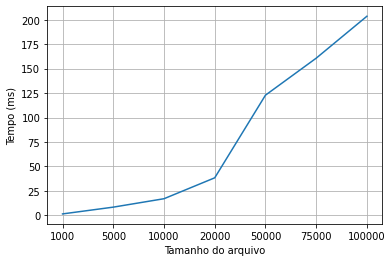

In [98]:

arr = ["1000", "5000", "10000", "20000", "50000", "75000", "100000"]

plt.plot(arr, execution_time_quick_sort_list)
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.savefig('temp/grafico-quick.png')
plt.show()

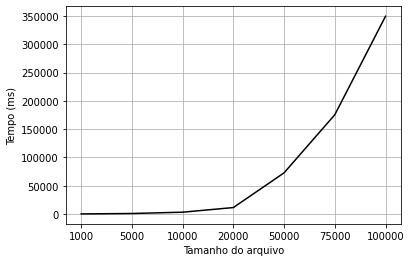

In [99]:
plt.plot(arr, execution_time_insertion_sort_list, color = "black")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.savefig('temp/grafico-insertion.png')
plt.show()

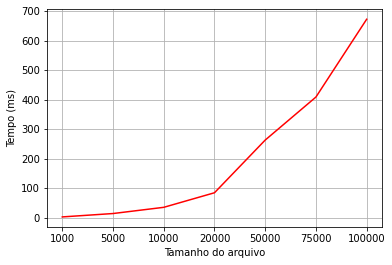

In [100]:
plt.plot(arr, execution_time_shell_sort_list, color = "red")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.savefig('temp/grafico-shell.png')
plt.show()

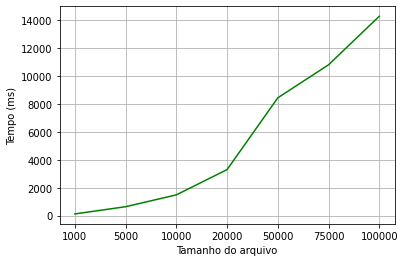

In [101]:
plt.plot(arr, execution_time_radix_sort_list, color = "green")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.savefig('temp/grafico-radix.png')
plt.show()

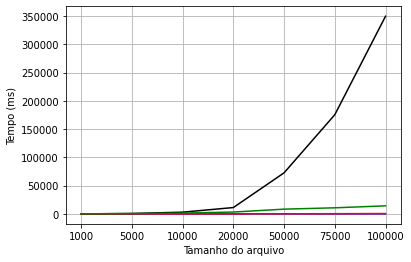

In [102]:
plt.plot(arr, execution_time_quick_sort_list, color = "blue")
plt.plot(arr, execution_time_insertion_sort_list, color = "black")
plt.plot(arr, execution_time_shell_sort_list, color = "red")
plt.plot(arr, execution_time_radix_sort_list, color = "green")
plt.xlabel("Tamanho do arquivo")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.savefig('temp/grafico-quick-shell-insertion-radix.png')
plt.show()

# Tabela

In [103]:
arquivo = open('temp/Tabela.txt','w')
arquivo.write("----------------------------- QuickSort -----------------------------\n")
for i in range(7):
  arquivo.write(str(arr[i]) + ".txt --> " + str(execution_time_quick_sort_list[i]) + "\n")
arquivo.write("--------------------------- InsertionSort ---------------------------\n")
for i in range(7):
  arquivo.write(str(arr[i]) + ".txt --> " + str(execution_time_insertion_sort_list[i]) + "\n")
arquivo.write("----------------------------- ShellSort -----------------------------\n")
for i in range(7):
  arquivo.write(str(arr[i]) + ".txt --> " + str(execution_time_shell_sort_list[i]) + "\n")
arquivo.write("----------------------------- radixSort -----------------------------\n")
for i in range(7):
  arquivo.write(str(arr[i]) + ".txt --> " + str(execution_time_radix_sort_list[i]) + "\n")
arquivo.close()